In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("/Users/saranshrana/Desktop/inventory product price prediction/inventory ready data.xlsx")

In [4]:
df.head()

,NO.,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Days,Weight,Price per unit
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,30,1.37kg,7137
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,30,1.34kg,4789
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,30,1.86kg,3063
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,30,1.83kg,13519
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,30,1.37kg,9609


In [5]:
df.isnull().sum()

NO.                 0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Days                0
Weight              0
Price per unit      0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NO.               1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Days              1303 non-null   int64  
 11  Weight            1303 non-null   object 
 12  Price per unit    1303 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 132.5+ KB


In [8]:
df= df.drop("NO.",axis= 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Days              1303 non-null   int64  
 10  Weight            1303 non-null   object 
 11  Price per unit    1303 non-null   int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 122.3+ KB


In [10]:
df["Ram"] = df["Ram"].str.replace("GB","")
df["Weight"] = df["Weight"].str.replace("kg","")

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Days,Weight,Price per unit
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,30,1.37,7137
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,30,1.34,4789
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,30,1.86,3063
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,30,1.83,13519
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,30,1.37,9609


In [12]:

df["Weight"]= df['Weight'].astype("float32")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Days              1303 non-null   int64  
 10  Weight            1303 non-null   float32
 11  Price per unit    1303 non-null   int64  
dtypes: float32(1), float64(1), int64(2), object(8)
memory usage: 117.2+ KB


In [14]:
df = df.rename(columns={"Price per unit " : "Price"})

In [15]:
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Days,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,30,1.37,7137
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,30,1.34,4789
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,30,1.86,3063
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,30,1.83,13519
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,30,1.37,9609


In [16]:
### visualization representation of data and their relation with the price

In [17]:
#vizualization of prices 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


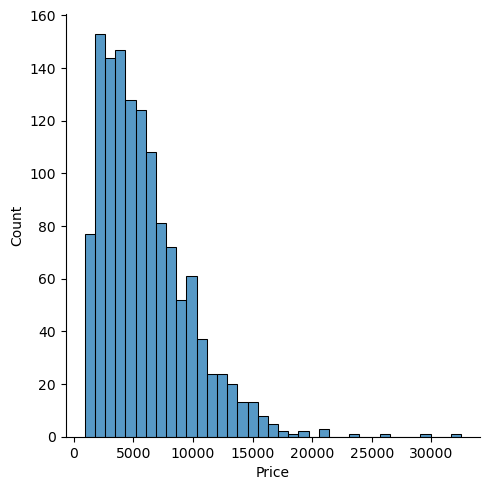

In [18]:
sns.displot(df["Price"])

In [19]:
####    visualization of brands  and their product

<Axes: xlabel='Company'>

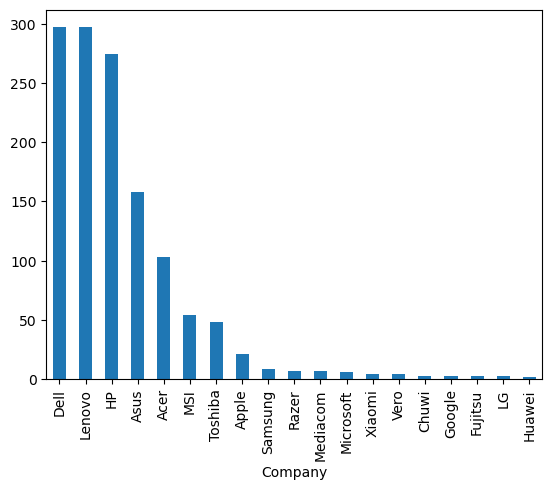

In [20]:
df["Company"].value_counts().plot(kind="bar")

In [21]:
### vizualization of brand and their relationship with the price

<function matplotlib.pyplot.show(close=None, block=None)>

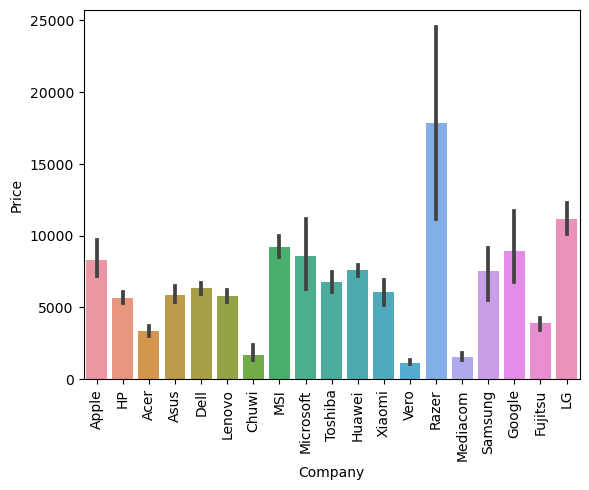

In [22]:
sns.barplot(x=df["Company"], y=df["Price"])
plt.xticks(rotation = "vertical")
plt.show

In [23]:
### vizualization of relationship between types of laptop and their prices 

<function matplotlib.pyplot.show(close=None, block=None)>

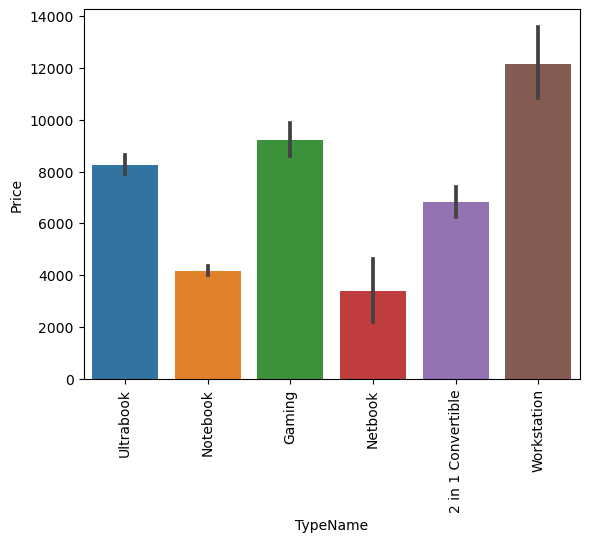

In [24]:
sns.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation = "vertical")
plt.show

In [25]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Days,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,30,1.37,7137
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,30,1.34,4789
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,30,1.86,3063
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,30,1.83,13519
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,30,1.37,9609


In [26]:
## Here inches are directly related to price, so we will Pixel per inches by using screen resolution and inches 

In [27]:
df["ScreenResolution"].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Touchscreen 2560x14

In [28]:
## feature engineering on screen resolution

In [29]:
## extracting touchscreen type , Ips type and X and Y resolution  (here X and Y resolution are used to find pixel per inches )

In [30]:
df["Touchscreen"] =df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [31]:
df["Ips"] = df["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)

In [32]:
new = df["ScreenResolution"].str.split('x', n=1,expand=True)

In [33]:
df["x_res"] = new[0]
df["y_res"] = new[1]


In [34]:
df['x_res']= df["x_res"].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [35]:
df["x_res"]=df["x_res"].astype("int32")
df["y_res"] = df["y_res"].astype("int32")

In [36]:
df['ppi']=(((df['x_res']**2)+(df['y_res']**2))**0.5/df['Inches']).astype('float')

In [37]:
df.drop(columns=['Inches'], inplace=True)
df.drop(columns=['x_res'], inplace=True)
df.drop(columns=['y_res'], inplace=True)


In [38]:
df.drop(columns =['ScreenResolution'],inplace = True)

In [39]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Days,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,30,1.37,7137,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,30,1.34,4789,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,30,1.86,3063,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,30,1.83,13519,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,30,1.37,9609,0,1,226.983005


In [40]:
## feature enginering on cpu columns

In [41]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
AMD A6-Series 7310 2GHz          1
AMD E-Series E2-6110 1.5GHz      1
Intel Core i7 6920HQ 2.9GHz      1
Name: count, Length: 118, dtype: int64

In [42]:
df["cpu_name"] =df["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

In [43]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Days,Weight,Price,Touchscreen,Ips,ppi,cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,30,1.37,7137,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,30,1.34,4789,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,30,1.86,3063,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,30,1.83,13519,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,30,1.37,9609,0,1,226.983005,Intel Core i5


In [44]:
df["cpu_name"].value_counts()

cpu_name
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
Intel Xeon E3-1505M           2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
Intel Atom x5-Z8300           1
AMD A12-Series 9700P          1
AMD E-Series 9000             1
Samsung Cortex A72&A53        1
AMD E-Series 9000e            1

In [45]:
def fetch_processor(text):
    if text == "Intel Core i7" or text =="Intel Core i5" or text == "Intel Core i3":
        return text
    else:
        if text.split()[0]=="Intel":
            return "other Intel processor"
        else:
            return "AMD Processor "

In [46]:
df["cpu_brand"] =df["cpu_name"].apply(fetch_processor)

In [47]:
df.sample(20)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Days,Weight,Price,Touchscreen,Ips,ppi,cpu_name,cpu_brand
1123,Dell,Notebook,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Linux,30,2.09,2789,0,0,100.454670,Intel Core i5,Intel Core i5
364,Lenovo,Notebook,Intel Core i3 6006U 2GHz,8,256GB SSD,Nvidia GeForce 920MX,No OS,30,2.20,2658,0,0,100.454670,Intel Core i3,Intel Core i3
252,Asus,Notebook,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,30,1.68,2498,0,0,100.454670,AMD A9-Series 9420,AMD Processor
514,Xiaomi,Notebook,Intel Core i7 8550U 1.8GHz,16,256GB SSD,Nvidia GeForce MX150,No OS,30,1.95,7458,0,1,141.211998,Intel Core i7,Intel Core i7
148,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,30,2.90,10810,0,0,127.335675,Intel Core i7,Intel Core i7
946,Dell,Notebook,Intel Core i7 8550U 1.8GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,30,2.16,6022,0,1,141.211998,Intel Core i7,Intel Core i7
102,Dell,Notebook,Intel Core i5 8250U 1.6GHz,8,1TB HDD,AMD Radeon 520,Linux,30,2.20,3447,0,0,141.211998,Intel Core i5,Intel Core i5
480,Dell,Ultrabook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,30,1.29,8652,1,0,276.053530,Intel Core i5,Intel Core i5
886,Dell,Notebook,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M420X,Linux,30,2.18,2427,0,0,100.454670,Intel Core i3,Intel Core i3
691,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,30,1.70,3724,0,0,157.350512,Intel Core i5,Intel Core i5


In [48]:
df["cpu_brand"].value_counts()

cpu_brand
Intel Core i7            527
Intel Core i5            423
other Intel processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

In [49]:
## vizualization of relationship between processor and price of the laptop

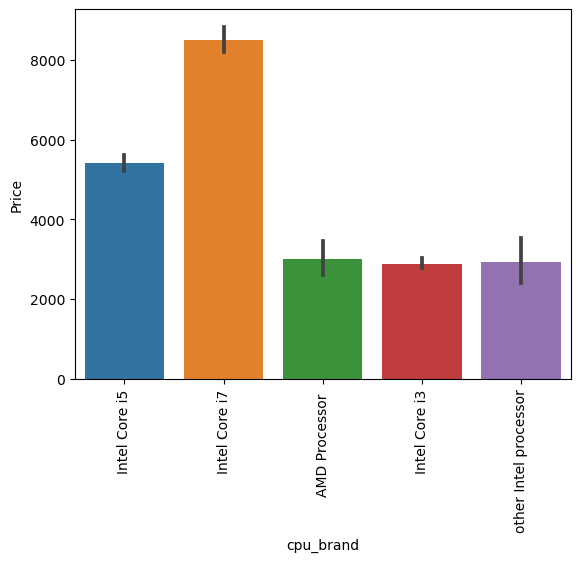

In [50]:
sns.barplot(x=df["cpu_brand"],y=df["Price"])
plt.xticks(rotation ="vertical")
plt.show()

In [51]:
df.drop(columns=["Cpu","cpu_name"],inplace = True)

In [52]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Days,Weight,Price,Touchscreen,Ips,ppi,cpu_brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,30,1.37,7137,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,30,1.34,4789,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,30,1.86,3063,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,30,1.83,13519,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,30,1.37,9609,0,1,226.983005,Intel Core i5


In [49]:
##vizualization of the the relationship between ram and price

<Axes: xlabel='Ram', ylabel='Price'>

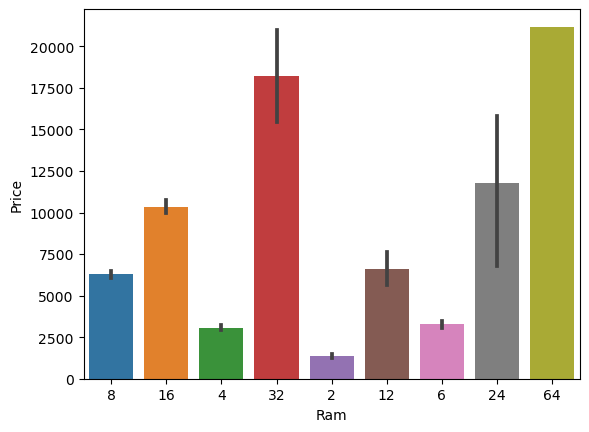

In [53]:
sns.barplot(x=df["Ram"],y=df["Price"])

In [448]:
## feature engineering on memory


In [54]:
df["Memory"].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
64GB Flash Storage +  1TB HDD  

In [55]:
import re

# Updated function to parse and assign memory values to the appropriate columns
def parse_memory(memory_string):
    ssd, hdd, hybrid, flash = 0, 0, 0, 0
    if isinstance(memory_string, str):
        memory_string = memory_string.replace('Flash Storage', 'Flash')
        memory_parts = re.split(r'(\d+GB)', memory_string)
        for i in range(len(memory_parts)):
            part = memory_parts[i]
            if 'SSD' in part:
                ssd = int(re.search(r'\d+', memory_parts[i-1]).group())
            elif 'HDD' in part:
                hdd = int(re.search(r'\d+', memory_parts[i-1]).group())
            elif 'Hybrid' in part:
                hybrid = int(re.search(r'\d+', memory_parts[i-1]).group())
            elif 'Flash' in part:
                flash = int(re.search(r'\d+', memory_parts[i-1]).group())
    return ssd, hdd, hybrid, flash

# Apply the function to each row
for i, row in df.iterrows():
    ssd, hdd, hybrid, flash = parse_memory(row['Memory'])
    df.at[i, 'SSD'] = ssd
    df.at[i, 'HDD'] = hdd
    df.at[i, 'Hybrid'] = hybrid
    df.at[i, 'Flash Storage'] = flash


In [56]:
## hybrid and flash_storage contain null values so we have to drop that  

In [57]:
df["SSD"].values

array([128.,   0., 256., ...,   0.,   0.,   0.])

In [58]:
df.drop(columns="Flash Storage",inplace=True)

In [59]:
df.drop(columns="Hybrid",inplace=True)

In [60]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Days,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,SSD,HDD
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,30,1.37,7137,0,1,226.983005,Intel Core i5,128.0,0.0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,30,1.34,4789,0,0,127.677940,Intel Core i5,0.0,0.0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,30,1.86,3063,0,0,141.211998,Intel Core i5,256.0,0.0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,30,1.83,13519,0,1,220.534624,Intel Core i7,512.0,0.0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,30,1.37,9609,0,1,226.983005,Intel Core i5,256.0,0.0


In [61]:
df.drop(columns="Memory",inplace=True)

In [62]:
df.sample(10)

,Company,TypeName,Ram,Gpu,OpSys,Days,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,SSD,HDD
1156,MSI,Gaming,16,Nvidia GeForce GTX 1050 Ti,Windows 10,30,2.70,7953,0,0,127.335675,Intel Core i7,256.0,0.0
1193,Apple,Ultrabook,8,Intel HD Graphics 5300,Mac OS X,30,0.92,6196,0,1,226.415547,other Intel processor,0.0,0.0
469,Lenovo,Ultrabook,12,Intel HD Graphics 520,Windows 10,30,1.40,9899,0,1,209.800683,Intel Core i7,256.0,0.0
702,Lenovo,Notebook,8,AMD Radeon R7,Windows 10,30,2.20,2285,0,0,100.454670,AMD Processor,0.0,1.0
67,HP,Notebook,4,Intel HD Graphics 400,Windows 10,30,1.44,1220,0,0,111.935204,other Intel processor,32.0,0.0
259,Lenovo,2 in 1 Convertible,8,Nvidia GeForce GTX 1050M,Windows 10,30,2.00,9052,1,1,141.211998,Intel Core i7,512.0,0.0
923,Toshiba,Notebook,16,Nvidia GeForce 930M,Windows 10,30,2.40,10522,0,1,141.211998,Intel Core i7,256.0,0.0
1179,HP,Notebook,4,Intel HD Graphics 520,Windows 10,30,2.07,3463,0,0,100.454670,Intel Core i3,0.0,500.0
1227,Dell,Notebook,4,Intel HD Graphics 520,Linux,30,2.18,2780,0,0,100.454670,Intel Core i5,0.0,1.0
202,Acer,Notebook,8,Nvidia GeForce 940MX,Windows 10,30,2.23,3953,0,0,141.211998,Intel Core i7,0.0,1.0


In [63]:
df.shape

(1303, 14)

In [64]:
#### Feature engineering on Gpu

In [65]:
df["Gpu"].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Intel Graphics 620           1
AMD FirePro W5130M           1
AMD Radeon R5 520            1
AMD Radeon R7                1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [66]:
## extracting the brand name of the graphic card 

In [67]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Days,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,30,1.37,7137,0,1,226.983005,Intel Core i5,128.0,0.0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,30,1.34,4789,0,0,127.677940,Intel Core i5,0.0,0.0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,30,1.86,3063,0,0,141.211998,Intel Core i5,256.0,0.0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,30,1.83,13519,0,1,220.534624,Intel Core i7,512.0,0.0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,30,1.37,9609,0,1,226.983005,Intel Core i5,256.0,0.0


In [68]:
df['Gpu_brand'] = df["Gpu"].apply(lambda x:x.split()[0])

In [69]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Days,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,SSD,HDD,Gpu_brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,30,1.37,7137,0,1,226.983005,Intel Core i5,128.0,0.0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,30,1.34,4789,0,0,127.677940,Intel Core i5,0.0,0.0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,30,1.86,3063,0,0,141.211998,Intel Core i5,256.0,0.0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,30,1.83,13519,0,1,220.534624,Intel Core i7,512.0,0.0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,30,1.37,9609,0,1,226.983005,Intel Core i5,256.0,0.0,Intel


In [70]:
df["Gpu_brand"].value_counts()

Gpu_brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [71]:
df[df["Gpu_brand"] == "ARM"]

,Company,TypeName,Ram,Gpu,OpSys,Days,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,SSD,HDD,Gpu_brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,30,1.15,3511,1,1,234.5074,AMD Processor,0.0,0.0,ARM


In [72]:
## deleting this column 

In [73]:
df = df[df["Gpu_brand"] != "ARM"]

In [74]:
df["Gpu_brand"].value_counts()

Gpu_brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [75]:
## vizualizing the relationship between the gpu brand name and the price 

<Axes: xlabel='Gpu_brand', ylabel='Price'>

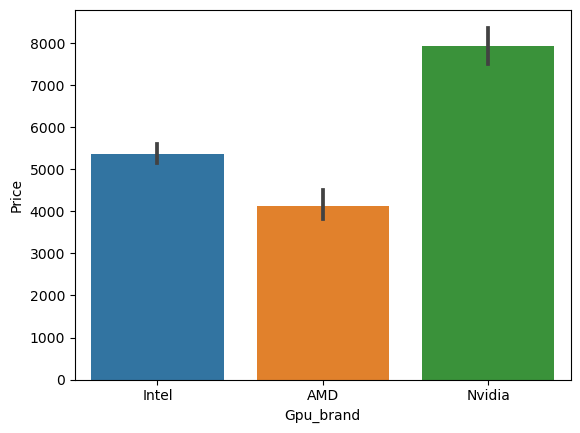

In [76]:
sns.barplot(x=df["Gpu_brand"],y=df["Price"])

In [77]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Days,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,SSD,HDD,Gpu_brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,30,1.37,7137,0,1,226.983005,Intel Core i5,128.0,0.0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,30,1.34,4789,0,0,127.677940,Intel Core i5,0.0,0.0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,30,1.86,3063,0,0,141.211998,Intel Core i5,256.0,0.0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,30,1.83,13519,0,1,220.534624,Intel Core i7,512.0,0.0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,30,1.37,9609,0,1,226.983005,Intel Core i5,256.0,0.0,Intel


In [78]:
df.drop(columns="Gpu",inplace=True)

In [79]:
df.sample(10)

,Company,TypeName,Ram,OpSys,Days,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,SSD,HDD,Gpu_brand
880,HP,2 in 1 Convertible,4,Windows 10,30,1.28,9057,1,0,165.632118,Intel Core i5,256.0,0.0,Intel
34,Apple,Ultrabook,8,Mac OS X,30,1.35,5317,0,0,127.677940,Intel Core i5,0.0,0.0,Intel
264,Dell,Notebook,8,Windows 10,30,2.24,3010,0,0,141.211998,Intel Core i5,0.0,1.0,AMD
762,Google,Ultrabook,8,Chrome OS,30,1.10,8306,1,0,234.507400,Intel Core i5,256.0,0.0,Intel
908,Lenovo,Notebook,8,Windows 10,30,2.60,4203,0,1,141.211998,Intel Core i5,128.0,0.0,Nvidia
63,Asus,Notebook,8,Windows 10,30,1.40,5013,0,0,157.350512,Intel Core i5,256.0,0.0,Intel
106,Lenovo,Notebook,4,Windows 10,30,1.85,2210,0,0,141.211998,Intel Core i3,0.0,1.0,Intel
666,Dell,Notebook,8,Windows 10,30,1.93,7294,0,0,141.211998,Intel Core i7,256.0,0.0,Nvidia
527,Lenovo,Notebook,8,No OS,30,2.20,2445,0,0,100.454670,Intel Core i3,0.0,2.0,Nvidia
500,Asus,Netbook,4,Windows 10 S,30,1.20,1811,0,0,135.094211,other Intel processor,0.0,0.0,Intel


In [80]:
## feature engeenering on opsys column :

In [81]:
df["OpSys"].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [82]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [83]:
df['os'] = df['OpSys'].apply(cat_os)

In [84]:
df.head()

,Company,TypeName,Ram,OpSys,Days,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,SSD,HDD,Gpu_brand,os
0,Apple,Ultrabook,8,macOS,30,1.37,7137,0,1,226.983005,Intel Core i5,128.0,0.0,Intel,Mac
1,Apple,Ultrabook,8,macOS,30,1.34,4789,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,No OS,30,1.86,3063,0,0,141.211998,Intel Core i5,256.0,0.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,30,1.83,13519,0,1,220.534624,Intel Core i7,512.0,0.0,AMD,Mac
4,Apple,Ultrabook,8,macOS,30,1.37,9609,0,1,226.983005,Intel Core i5,256.0,0.0,Intel,Mac


In [484]:
## correlation of every coulmn with each other

In [85]:
relevant_columns = [ 'Ram', 'Weight', 'SSD', 'HDD', 'ppi','Touchscreen','Ips','Price']
numeric_df = df[relevant_columns]


correlation_matrix = numeric_df.corr()

correlation_matrix 


,Ram,Weight,SSD,HDD,ppi,Touchscreen,Ips,Price
Ram,1.000000,0.383362,0.463053,-0.270095,0.305688,0.118875,0.207949,0.742906
Weight,0.383362,1.000000,-0.096039,0.018364,-0.321883,-0.293004,0.018643,0.209866
SSD,0.463053,-0.096039,1.000000,-0.352007,0.424062,0.218246,0.225166,0.552992
HDD,-0.270095,0.018364,-0.352007,1.000000,-0.261169,-0.119771,-0.172368,-0.235398
ppi,0.305688,-0.321883,0.424062,-0.261169,1.000000,0.458571,0.299142,0.475369
Touchscreen,0.118875,-0.293004,0.218246,-0.119771,0.458571,1.000000,0.148026,0.192918
Ips,0.207949,0.018643,0.225166,-0.172368,0.299142,0.148026,1.000000,0.253322
Price,0.742906,0.209866,0.552992,-0.235398,0.475369,0.192918,0.253322,1.000000


In [86]:
df.drop(columns="OpSys",inplace=True)

In [487]:
## the targeted column is skewed that means it is data is not evenly  distributed among the rows 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


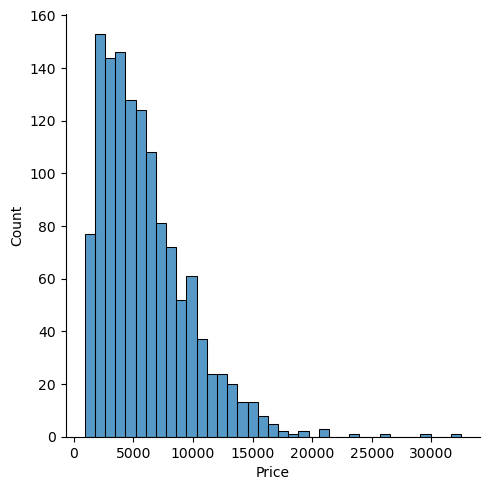

In [87]:
sns.displot(df["Price"])

In [489]:
## we will use log transformation on our data to unskew it.

/var/folders/5d/7f3wxfs168xbd6zk4h29s4lh0000gn/T/ipykernel_14701/3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

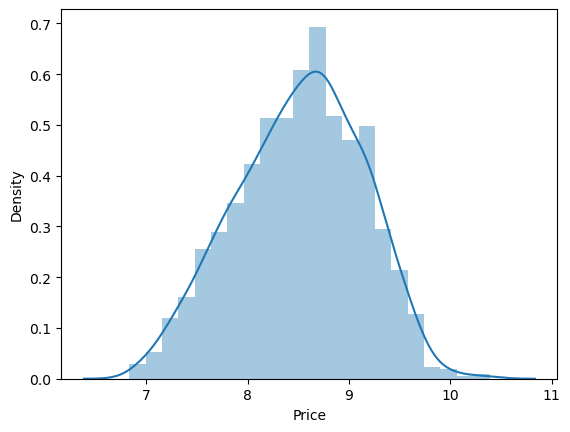

In [88]:
sns.distplot(np.log(df['Price']))

In [89]:
df.head()

,Company,TypeName,Ram,Days,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,SSD,HDD,Gpu_brand,os
0,Apple,Ultrabook,8,30,1.37,7137,0,1,226.983005,Intel Core i5,128.0,0.0,Intel,Mac
1,Apple,Ultrabook,8,30,1.34,4789,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,30,1.86,3063,0,0,141.211998,Intel Core i5,256.0,0.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,30,1.83,13519,0,1,220.534624,Intel Core i7,512.0,0.0,AMD,Mac
4,Apple,Ultrabook,8,30,1.37,9609,0,1,226.983005,Intel Core i5,256.0,0.0,Intel,Mac


In [118]:
df.shape

(1302, 13)

In [119]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [120]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,cpu_brand,SSD,HDD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,128.0,0.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,256.0,0.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,512.0,0.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,256.0,0.0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,128.0,0.0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,512.0,0.0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,other Intel processor,0.0,0.0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,0.0,1.0,AMD,Windows


In [121]:
y

0       8.873048
1       8.474077
2       8.027150
3       9.511851
4       9.170455
          ...   
1298    8.131237
1299    8.985445
1300    7.106606
1301    8.311398
1302    7.583756
Name: Price, Length: 1302, dtype: float64

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [123]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,cpu_brand,SSD,HDD,Gpu_brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,128.0,0.0,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,128.0,0.0,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,other Intel processor,0.0,0.0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,0.0,1.0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,128.0,0.0,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,0.0,500.0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,512.0,0.0,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,0.0,1.0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,0.0,2.0,Nvidia,Others/No OS/Linux


In [96]:
#### Testing each model

In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [125]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [501]:
## linear regression 

In [502]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))


R2 score 0.8170523973690806


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [503]:
## ridge regression

In [504]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))


R2 score 0.8221099991863852


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [505]:
### knn 

In [506]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,8,11,12])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))



R2 score 0.842940385999726


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [99]:
## Random forset.

In [127]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore',sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))


R2 score 0.890010529614261


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [509]:
## decision treee

In [104]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))


R2 score 0.8406773532489218


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [128]:
import pickle
 
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))


In [129]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,cpu_brand,SSD,HDD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,7137,0,1,226.983005,Intel Core i5,128.0,0.0,Intel,Mac
1,Apple,Ultrabook,8,1.34,4789,0,0,127.677940,Intel Core i5,0.0,0.0,Intel,Mac
2,HP,Notebook,8,1.86,3063,0,0,141.211998,Intel Core i5,256.0,0.0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,13519,0,1,220.534624,Intel Core i7,512.0,0.0,AMD,Mac
4,Apple,Ultrabook,8,1.37,9609,0,1,226.983005,Intel Core i5,256.0,0.0,Intel,Mac
